## [Source code](https://github.com/ebwieman/ebwieman.github.io/blob/main/posts/logistic-regression/logistic.py)

## Implementing Logistic Regression with Gradient Descent
Implementing logistic loss with gradient descent does not differ hugely from implementing the perceptron algorithm, which I do in my last blog post. Both algorithms follow a similar formula of intializing random weights, and iteratively performing weight updates and calculating loss until the algorithm converges (or max iterations are performed). The main differences are the way that the weight update is performed and the function used to calculate loss. In this implementation, the weights are updated by calculating the gradient of the loss function with current weights, and then multiplying this by a specified learning rate and subtracting it from the current weights. Gradient descent converges when the gradient is zero, meaning a local minimum is found, and the loss stops updating. In this case, logistic loss was used. Logistic loss was chosen because it is a convex function, which means that we can treat local minima as global minima, making it easier to solve for the optimal weights. To train our logistic regression model, we follow a similar pattern of fitting the model to training data and calculating accuracy and loss as we train to see if the model is learning successfully.

### Testing the logistic regression model
To train and experiment on our model we must first create some data. Here we create data that is not quite linearly separable, but is relatively close.

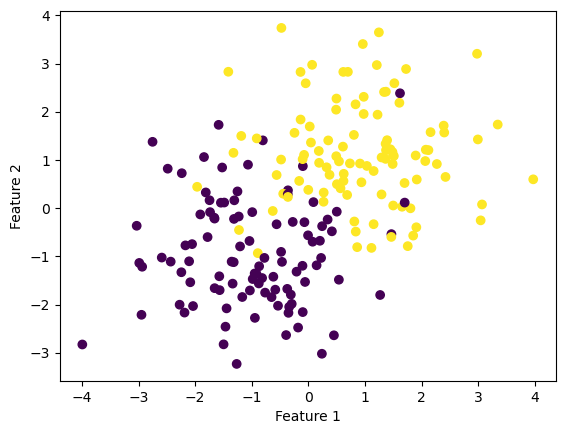

In [1]:
from logistic import LogisticRegression # your source code
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
np.seterr(all='ignore') 

# make the data
p_features = 3
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

After creating and visualizing some data, we fit it and visualize the loss and accuracy overtime.

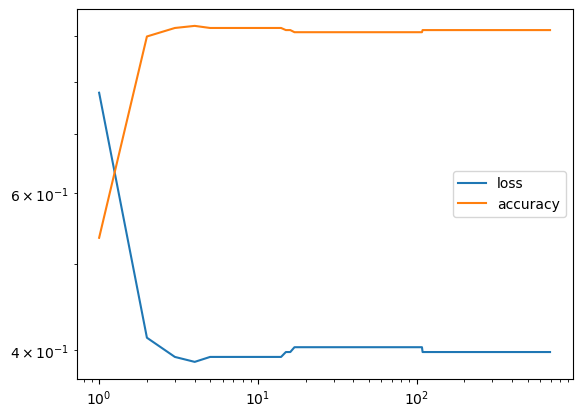

In [12]:
LR = LogisticRegression()
LR.fit(X, y, .5, 1000)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "loss")
plt.plot(np.arange(num_steps) + 1, LR.score_history, label = "accuracy")

plt.loglog()

legend = plt.legend()

We see that as the loss decreases, the accuracy increases, which makes sense. If we run the model numerous times, we see that the amount of time it takes for the model to converge varies, which is largely a result of the initial random weight chosen.

(-3.0, 3.0)

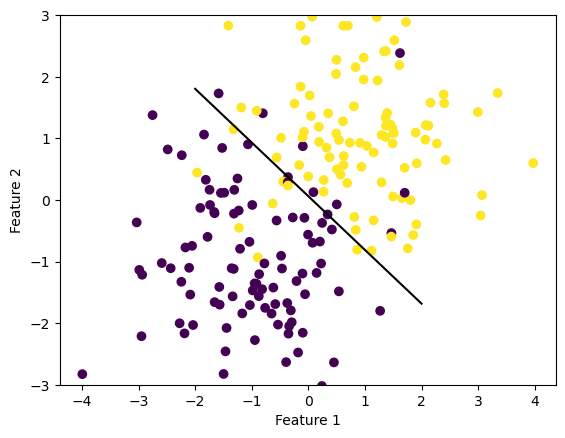

In [13]:
def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(LR.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")
plt.ylim([-3,3])

In [14]:
LR.score_history[-1]

0.915

If we visualize the line drawn by our final weights, we see that it does a very good job of classifying our data. When we print the final accuracy we get 0.915, which seems reasonable for data that is not linearly separable. If we run these cells several times, we see the same line drawn each time, even if the evolution of the loss and accuracy looks different. This suggests that our logistic regression algorithm is always converging to the global minima, even if it doesn't always take the same amount of time.

### Changing the learning rate
We can alter values of alpha, the learning rate, to make our algorithm converge more quickly. However, if we make our learning rate too large, our algorithm will never converge because it will jump over the minima each time it makes an update. To see this, lets set our learning rate to 40.

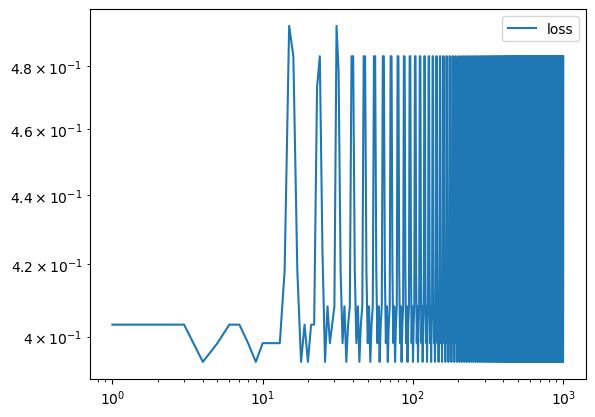

In [15]:
LR = LogisticRegression()
LR.fit(X, y, 40, 1000)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "loss")
#plt.plot(np.arange(num_steps) + 1, LR.score_history, label = "accuracy")

plt.loglog()

legend = plt.legend()

We can see that when we do this, the algorithm never converges, but instead the loss bounces around between approximately 0.48 and 0.4 loss between epochs 10 and 1000.

### Logistic regression with stochastic gradient descent
Next we implement logistic regression with stochastic gradient descent. This function uses the same principal of gradient descent, but it splits the data into batches and performs a weight update for each batch before updating the loss and score. By performing multiple updates within each epoch, the algorithm will likely converge more quickly.

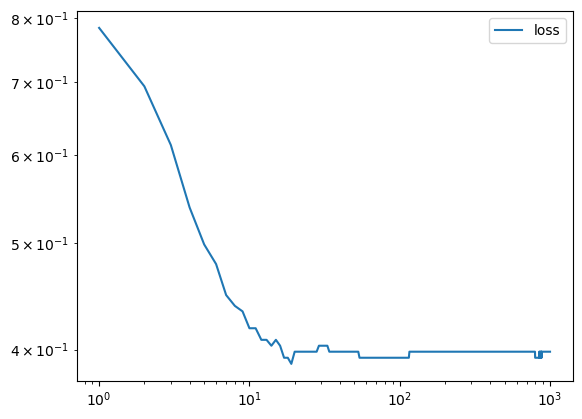

In [23]:
LR = LogisticRegression()

LR.fit_stochastic(X, y, .01, 1000, 10)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "loss")
#plt.plot(np.arange(num_steps) + 1, LR.score_history, label = "accuracy")

plt.loglog()

legend = plt.legend()

(-3.0, 3.0)

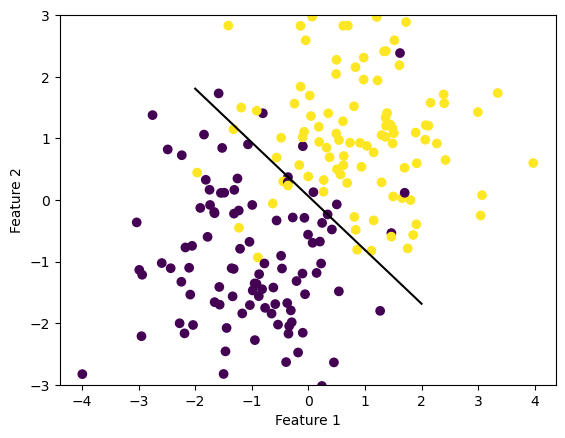

In [24]:
fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(LR.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")
plt.ylim([-3,3])

In [25]:
LR.score_history[-1]

0.915

Our stochastic algorithm also draws the same line, although we need to use a smaller learning rate to allow the algorithm to converge, and we see small fluctuations at higher epochs.

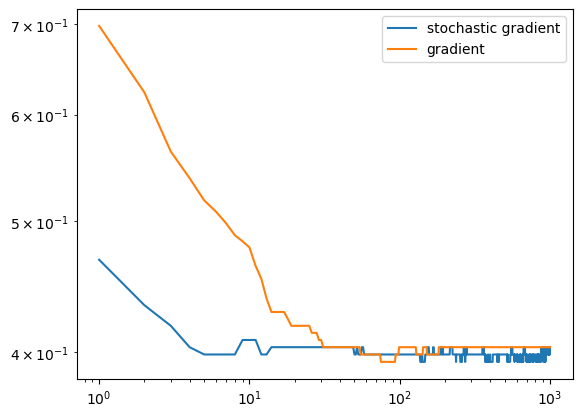

In [46]:
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 1000, 
                  batch_size = 10, 
                  alpha = .05)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient")

LR = LogisticRegression()
LR.fit(X, y, alpha = .05, max_epochs = 1000)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")

plt.loglog()

legend = plt.legend()

When we compare the stochastic versus regular gradient descent, we can see that the stochastic loss decreases more quickly at the beginning, but we see small fluctuations in loss at later timesteps.

 Now lets compare a series of batch sizes and see how it affects how quickly the algorithm converges.

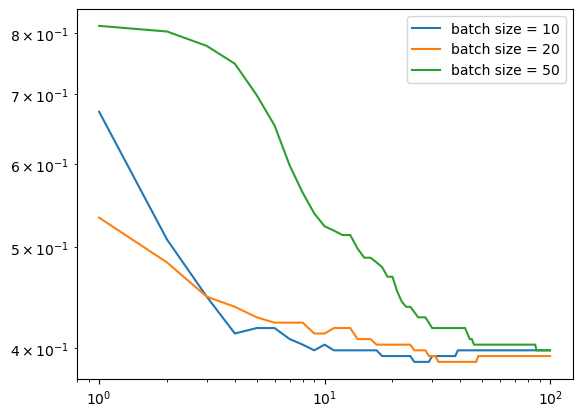

In [59]:
LR = LogisticRegression()

LR.fit_stochastic(X, y, .01, 100, 10)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "batch size = 10")
#plt.plot(np.arange(num_steps) + 1, LR.score_history, label = "accuracy")

LR = LogisticRegression()

LR.fit_stochastic(X, y, .01, 100, 20)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "batch size = 20")

LR = LogisticRegression()

LR.fit_stochastic(X, y, .01, 100, 50)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "batch size = 50")

plt.loglog()

legend = plt.legend()

We can see that as we increase the batch size, the algorithm takes longer to converge. This makes sense, as the power of stochastic gradient descent lies in performing several updates within each epoch. As we increase the batch size, we decrease the number of updates performed in each epoch, requiring more epochs for the algorithm to converge.